# Оценка корректности проведённого A/B-тестирования

### Содержание:<br>
Шаг 1. Предобработка данных<br>
Шаг 2. Оценка корректности проведения теста<br>
Шаг 3. Исследовательский анализ данных<br>
Шаг 4. Проведение оценки результатов A/B-тестирования<br>
Шаг 5. Общие выводы 

### Описание исследования:

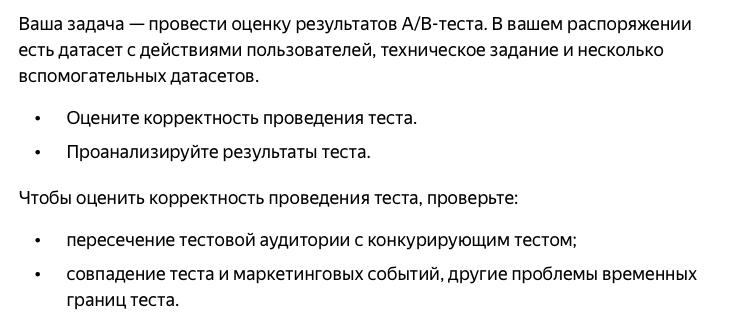

### Описание данных:

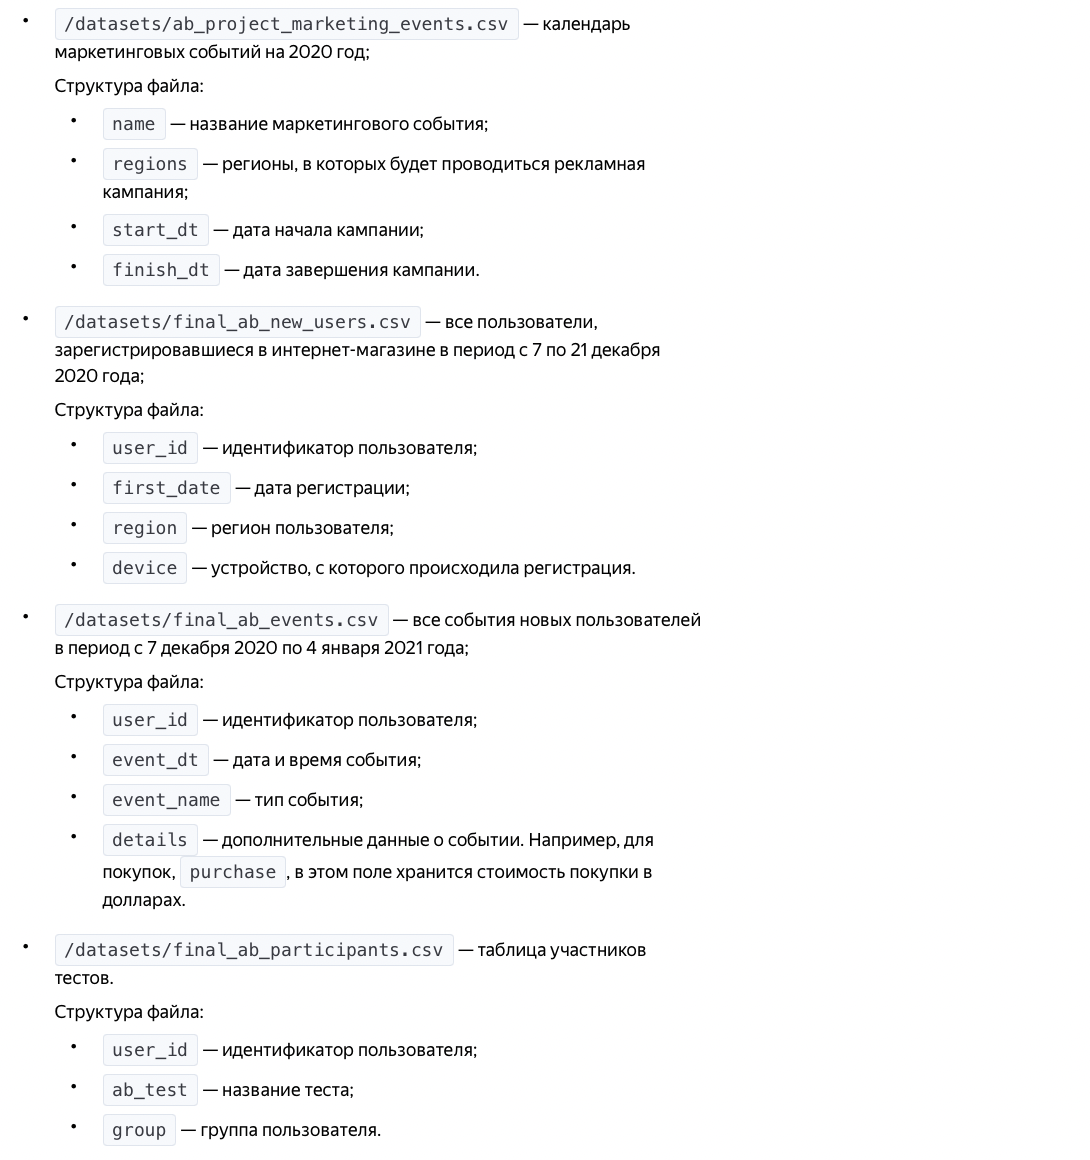

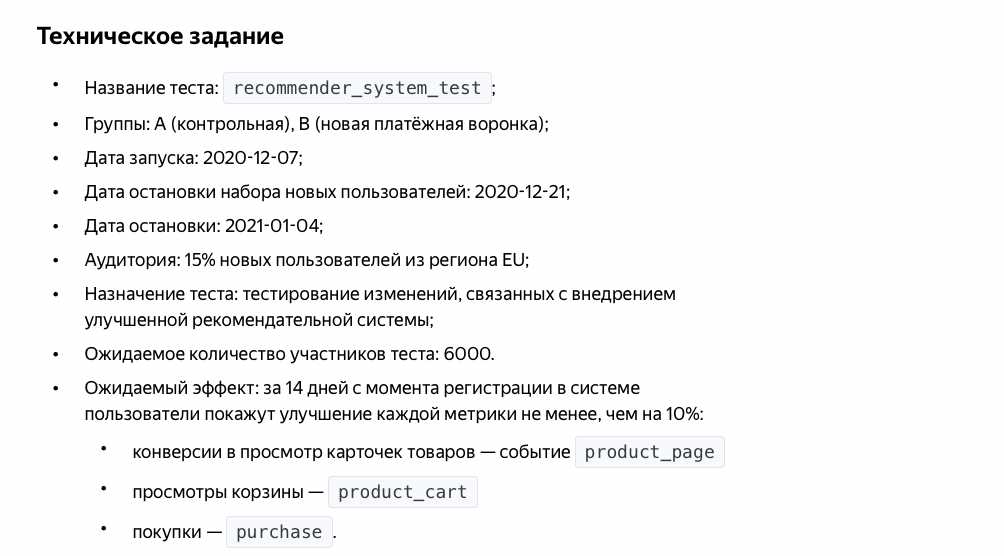

### План исследования:

Шаг 1. Предобработка данных

- импортировать необходимые для исследования библиотеки
- подгрузить датасеты ab_project_marketing_events.csv, final_ab_new_users.csv, final_final_ab_new_users.csv, final_final_ab_participants.csv
- ознакомиться с данными
- проверить данные на пропуски и дубликаты
- сделать промежуточные выводы

Шаг 2. Оценка корректности проведения теста
- оценить соответствие данных требованиям ТЗ
- проверить корректность выполнения всех пунктов ТЗ
- убедиться, что время проведения теста НЕ совпадает с маркетинговыми и другими активностями
- удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно 
- проверить равномерность распределения пользователей по тестовым группам и правильность их формирования

Шаг 3. Исследовательский анализ данных
- Количество событий на пользователя одинаково распределены в выборках?
- Как число событий в выборках распределено по дням?
- Как меняется конверсия в воронке в выборках на разных этапах?
- Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

Шаг 4. Проведение оценки результатов A/B-тестирования
- Что можно сказать про результаты A/B-тестирования?
- Проверить статистическую разницу долей z-критерием

Шаг 5. Общие выводы 
- сформировать выводы по результатам исследования
- сформулировать рекомендации

# Шаг 1. Предобработка данных

### - импортировать необходимые для исследования библиотеки

In [1]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

import seaborn as sns

from matplotlib import pyplot as plt

import datetime as dt

import math

from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.simplefilter('ignore')

### - подгрузить датасеты ab_project_marketing_events.csv, final_ab_new_users.csv, final_final_ab_new_users.csv, final_final_ab_participants.csv

In [2]:
try:
    ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
    final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')    
except:
    ab_project_marketing_events = pd.read_csv('ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('final_ab_new_users.csv')
    final_ab_events = pd.read_csv('final_ab_events.csv')
    final_ab_participants = pd.read_csv('final_ab_participants.csv')

### - ознакомиться с данными

In [3]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [5]:
final_ab_new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [6]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [7]:
final_ab_new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [8]:
final_ab_new_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

In [9]:
final_ab_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [10]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [11]:
final_ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [12]:
final_ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [13]:
final_ab_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [14]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [15]:
final_ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

### - проверить данные на пропуски и дубликаты

In [16]:
ab_project_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [17]:
final_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [18]:
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [19]:
final_ab_events['details'] = final_ab_events['details'].fillna(value=0)

In [20]:
final_ab_events.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

In [21]:
final_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [22]:
ab_project_marketing_events.duplicated().sum()

0

In [23]:
final_ab_new_users.duplicated().sum()

0

In [24]:
final_ab_events.duplicated().sum()

0

In [25]:
final_ab_participants.duplicated().sum()

0

### - изменение типа данных

In [26]:
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'])
ab_project_marketing_events['start_dt'] = ab_project_marketing_events['start_dt'].dt.strftime("%Y-%m-%d")

ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'])
ab_project_marketing_events['finish_dt'] = ab_project_marketing_events['finish_dt'].dt.strftime("%Y-%m-%d")

ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [27]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'])
final_ab_events['event_dt'] = final_ab_events['event_dt'].dt.strftime("%Y-%m-%d")
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     440317 non-null  float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [28]:
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'])
# final_ab_new_users['first_date'] = final_ab_new_users['first_date'].dt.strftime("%Y-%m-%d")
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


### - сделать промежуточные выводы

На этапе предобработки данных мы импортировали необходимые библиотеке, после этого мы подгрузили четыре таблицы, с которыми будем работать в дальнейшем. После этого мы ознакомились с данными, проверили каждую таблицу на наличие пропущенных значений и дубликатов. В таблице “ab_new_users” было 377577 пропущенных значений (это связано с тем, что в данной колонке - “details”, указывается стоимость покупки, только во время события purchase. Пропущенные значения были заменены на 0). Также, для всех столбцов с датами был изменен тип данных для удобства дальнейшей работы. 

**Данные были подготовлены для анализа.** 

# Шаг 2. Оценка корректности проведения теста

### - оценить соответствие данных требованиям ТЗ

###### Ожидаемое количество участников теста: 6000

In [29]:
number_of_participants = final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test']
number_of_participants.ab_test.count()

6701

Из первичных данных видно, что в тесте принимает участие 6701 пользователь, но так ли это на самом деле? (Необходимо проверить соблюдение всех условий, указанных в ТЗ)

###### Запуск: 20-12-07 <br>Остановка набора: 20-12-21 <br>Остановка: 21-01-04

In [30]:
print('Фактическое начало набора: ', final_ab_new_users['first_date'].min())
print('Фактическая остановка набора новых пользователей ', final_ab_new_users['first_date'].max())

Фактическое начало набора:  2020-12-07 00:00:00
Фактическая остановка набора новых пользователей  2020-12-23 00:00:00


In [31]:
print('Начало сбора информации о событиях, совершенных новыми пользователями \n ', final_ab_events['event_dt'].min())
print('Конец сбора информации о событиях, совершенных новыми пользователями \n ', final_ab_events['event_dt'].max())

Начало сбора информации о событиях, совершенных новыми пользователями 
  2020-12-07
Конец сбора информации о событиях, совершенных новыми пользователями 
  2020-12-30


Нужно отметить, что сбор информации о событиях, совершенных пользователями по какой-то причине был остановлен 30 декабря, в то время как должен был происходить до 4 января включительно.

In [32]:
final_ab_new_users_old = final_ab_new_users.shape
final_ab_new_users_old

(61733, 4)

In [33]:
final_ab_new_users = final_ab_new_users.query('first_date < "2020-12-22"')
final_ab_new_users.first_date.unique()

array(['2020-12-07T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-09T00:00:00.000000000',
       '2020-12-16T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-11T00:00:00.000000000',
       '2020-12-18T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-13T00:00:00.000000000',
       '2020-12-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [34]:
final_ab_new_users.shape

(56470, 4)

После обрезки нашего датасета в соответсвии с условиями ТЗ мы "потеряли" 5263 пользователя. 

###### 15% новых пользователей из EU

In [35]:
EU_15 = final_ab_participants.query('ab_test == "recommender_system_test"')
EU_15 = EU_15.merge(final_ab_new_users, on='user_id')
EU_15 = EU_15.groupby('region')['user_id'].agg(num_of_participants ='count')
EU_15['share'] = EU_15/EU_15.num_of_participants.sum()
print('Разбивка пользователей-участников теста recommender_system_test по регионам: \n \n ', EU_15)

Разбивка пользователей-участников теста recommender_system_test по регионам: 
 
             num_of_participants  share
region                               
APAC                        72   0.01
CIS                         55   0.01
EU                        6351   0.95
N.America                  223   0.03


In [36]:
EU_15_share = final_ab_participants.query('ab_test == "recommender_system_test"')
EU_15_share = EU_15_share.merge(final_ab_new_users, on='user_id')
EU_15_share = EU_15_share['region'][EU_15_share['region'] == 'EU'].count() / final_ab_new_users['region'][final_ab_new_users['region'] == 'EU'].count()
EU_15_share

0.15

Мы выяснили, что, при соблюдении дат запуска набора и остановки набора из ТЗ, доля новых пользователей из EU равна 15%. Условие выполнено.

###### Ожидаемый эффект: увеличение всех метрик не менее, чем на 10%
    - конверсии в просмотр карточек товаров - product page
    - просмотры корзины - product_cart
    - покупки - purchase

In [37]:
conversion = final_ab_participants.query('ab_test == "recommender_system_test"')
conversion = conversion.merge(final_ab_events, on='user_id', how='left')

In [38]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27724 entries, 0 to 27723
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     27724 non-null  object 
 1   group       27724 non-null  object 
 2   ab_test     27724 non-null  object 
 3   event_dt    24698 non-null  object 
 4   event_name  24698 non-null  object 
 5   details     24698 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.5+ MB


После объединения таблиц, нам видно, что некоторые пользователи не совершали событий, их необходимо удалить

In [39]:
conversion = conversion.dropna(subset=['event_name'])
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 27723
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     24698 non-null  object 
 1   group       24698 non-null  object 
 2   ab_test     24698 non-null  object 
 3   event_dt    24698 non-null  object 
 4   event_name  24698 non-null  object 
 5   details     24698 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


Таким образом, мы подготовили данные для анализа изменений конверсии в воронке в выборках на разных этапах.

### - убедиться, что время проведения теста НЕ совпадает с маркетинговыми и другими активностями

In [40]:
time_of_event = ab_project_marketing_events.query('start_dt > "2020-12-07" or finish_dt > "2020-12-07"')
time_of_event = time_of_event.query('regions.str.contains("EU")')
time_of_event

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


На наш тест могут влиять Christmas&New Year Promo

### - удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно 

In [41]:
test_crossing_within_our_test = final_ab_participants.query('ab_test == "recommender_system_test"')
test_crossing_within_our_test = test_crossing_within_our_test.user_id.duplicated().sum()

test_crossing = final_ab_participants['user_id'].duplicated().sum()

print('Количество пользователей, которые одновременно участвуют в двух группах нашего теста:\n',test_crossing_within_our_test)

print('Количество пользователей, которые одновременно участвуют в двух тестах:\n', test_crossing)

Количество пользователей, которые одновременно участвуют в двух группах нашего теста:
 0
Количество пользователей, которые одновременно участвуют в двух тестах:
 1602


Думаю, что данных пользователей можно оставить, так как ситуация, когда пользователи пересекаются между тестами является распространенной. Также, у меня отсутсвует информация о ТЗ теста "interface_eu_test", что не даёт мне возможности оценить потенциального влияния одного теста на другой.

### - проверить равномерность распределения пользователей по тестовым группам и правильность их формирования

In [42]:
users_distribution = final_ab_participants.query('ab_test == "recommender_system_test"')
users_distribution = users_distribution.groupby('group')['user_id'].agg(number_of_users='count')
users_distribution['share'] = users_distribution / users_distribution.sum()
users_distribution

,number_of_users,share
group,,
A,3824,0.57
B,2877,0.43


### - отсечь события, которые были спустя 14 дней после регистрации

In [43]:
conversion = conversion.merge(final_ab_new_users, on='user_id')
conversion
conversion = (conversion.drop(conversion[conversion['event_dt'] >= (conversion['first_date'] + pd.Timedelta(days=14))].index))
conversion

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,purchase,99.99,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,product_cart,0.00,2020-12-07,EU,PC
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,product_page,0.00,2020-12-07,EU,PC
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,login,0.00,2020-12-07,EU,PC
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,product_page,0.00,2020-12-20,EU,iPhone
...,...,...,...,...,...,...,...,...,...
24693,6715343AFBA285AE,B,recommender_system_test,2020-12-07,login,0.00,2020-12-07,CIS,Android
24694,6715343AFBA285AE,B,recommender_system_test,2020-12-08,login,0.00,2020-12-07,CIS,Android
24695,6715343AFBA285AE,B,recommender_system_test,2020-12-09,login,0.00,2020-12-07,CIS,Android
24696,6715343AFBA285AE,B,recommender_system_test,2020-12-10,login,0.00,2020-12-07,CIS,Android


In [44]:
conversion['user_id'].nunique()

3675

In [45]:
conversion.groupby('region')['user_id'].count()

region
APAC           225
CIS            196
EU           22620
N.America      815
Name: user_id, dtype: int64

In [46]:
conversion = conversion[conversion['region'] == "EU"]
conversion.region.unique()

array(['EU'], dtype=object)

In [47]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22620 entries, 0 to 23419
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     22620 non-null  object        
 1   group       22620 non-null  object        
 2   ab_test     22620 non-null  object        
 3   event_dt    22620 non-null  object        
 4   event_name  22620 non-null  object        
 5   details     22620 non-null  float64       
 6   first_date  22620 non-null  datetime64[ns]
 7   region      22620 non-null  object        
 8   device      22620 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.7+ MB


In [48]:
conversion.user_id.nunique()

3481

### Промежуточные выводы:

Во время оценки корректности проведения теста мы выяснили, что:
- ожидаемое количество уникальных пользователей, принимающих участие в тесте и СОВЕРШАЮЩИХ какие-либо события оказалось значительно меньше (3481 вместо 6000)
- Фактическое начало набора новых пользователей корректно
- фактическая остановка набора новых пользователей завершилась на два дня позднее срока, обозначенного в ТЗ
- доля пользователей из EU составляет 15% (Условие выполнено)
- На наш тест могут влиять Christmas&New Year Promo
- в нашем тесте отсутствуют “пересечения” пользователей в A/B-группах 
- есть пересечения с “конкурирующим тестом”, количество пользователей, которые одновременно участвуют в двух тестах: 1602
- нужно работать над более равномерным распределением пользователей по группа A/B-теста, есть перекос, которого можно избегать в дальнейшем (группа А - 57%, группа B - 43%)

# Шаг 3. Исследовательский анализ данных

### - Количество событий на пользователя одинаково распределены в выборках?

In [49]:
events_per_user = conversion.groupby(['group','user_id']).agg({'event_dt':'count'})
events_per_user

event_dt
group user_id                   
A     0010A1C096941592        12
      00341D8401F0F665         2
      003DF44D7589BBD4        15
      00505E15A9D81546         5
      006E3E4E232CE760         6
...                          ...
B     FE76759FE6BF8C68        16
      FE8F9858BBE502D9         2
      FEA0C585A53E7027         3
      FF8CF7057415EB29         4
      FFF28D02B1EACBE1         9

[3481 rows x 1 columns]

In [50]:
events_per_user_A = events_per_user.query('group == "A"')
events_per_user_A.describe()

,event_dt
count,"2,604.00"
mean,6.85
std,3.81
min,1.00
25%,4.00
50%,6.00
75%,9.00
max,24.00


In [51]:
events_per_user_B = events_per_user.query('group == "B"')
events_per_user_B.describe()

,event_dt
count,877.00
mean,5.46
std,3.25
min,1.00
25%,3.00
50%,4.00
75%,8.00
max,24.00


Text(0.5, 1.0, 'Количество событий на пользователя')

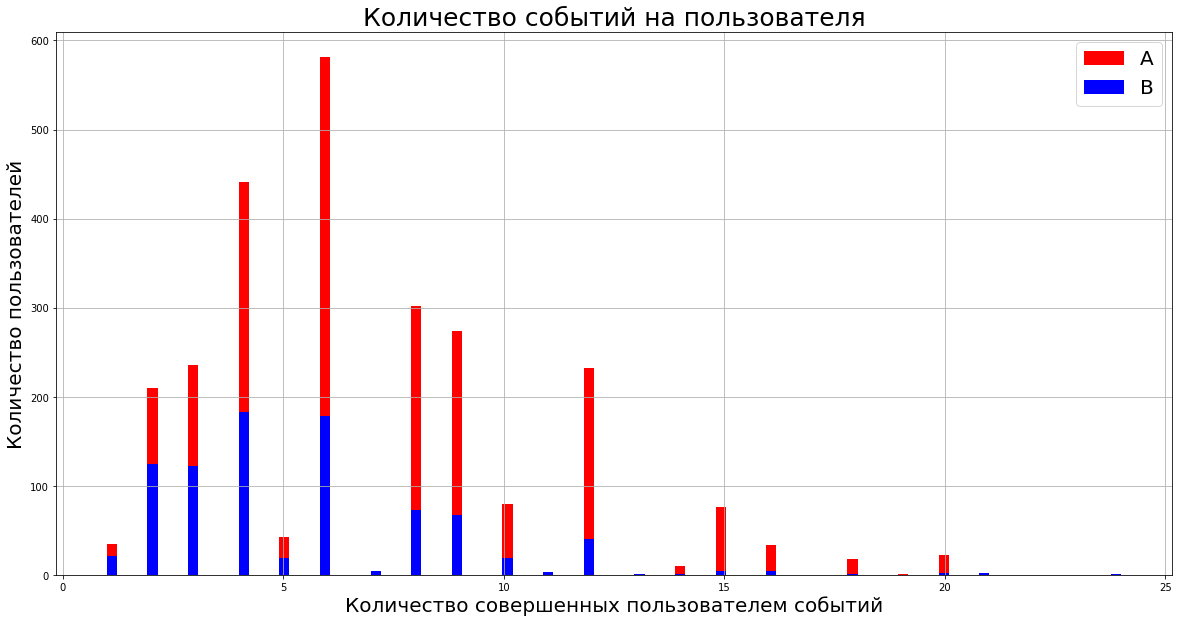

In [52]:
events_per_user_A['event_dt'].hist(bins=100,figsize=(20,10), label='A', color='r')
events_per_user_B['event_dt'].hist(bins=100,figsize=(20,10), label='B', color='b')
plt.legend(fontsize=20)
plt.xlabel('Количество совершенных пользователем событий', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.title('Количество событий на пользователя', fontsize=25)

Можно сказать, что распределение количества событий на пользователя в группах почти одинаковое. Также, мы выяснили, что:

- среднее количество событий на пользователя в группе А: 6.85
- среднее количество событий на пользователя в группе B: 5.46

### - Как число событий в выборках распределено по дням?

In [53]:
events_by_day = conversion.groupby(['group','event_dt'])['event_name'].count()
events_by_day

group  event_dt  
A      2020-12-07     318
       2020-12-08     313
       2020-12-09     371
       2020-12-10     331
       2020-12-11     356
       2020-12-12     346
       2020-12-13     308
       2020-12-14    1015
       2020-12-15    1030
       2020-12-16    1007
       2020-12-17    1200
       2020-12-18    1244
       2020-12-19    1430
       2020-12-20    1434
       2020-12-21    1888
       2020-12-22    1208
       2020-12-23     942
       2020-12-24     800
       2020-12-25     598
       2020-12-26     541
       2020-12-27     506
       2020-12-28     381
       2020-12-29     268
B      2020-12-07     356
       2020-12-08     238
       2020-12-09     338
       2020-12-10     249
       2020-12-11     161
       2020-12-12     199
       2020-12-13     164
       2020-12-14     248
       2020-12-15     222
       2020-12-16     369
       2020-12-17     281
       2020-12-18     259
       2020-12-19     288
       2020-12-20     309
       2020-12-21   

In [54]:
conversion = conversion.sort_values(by='event_dt')

In [55]:
categorical_columns = ['event_dt']

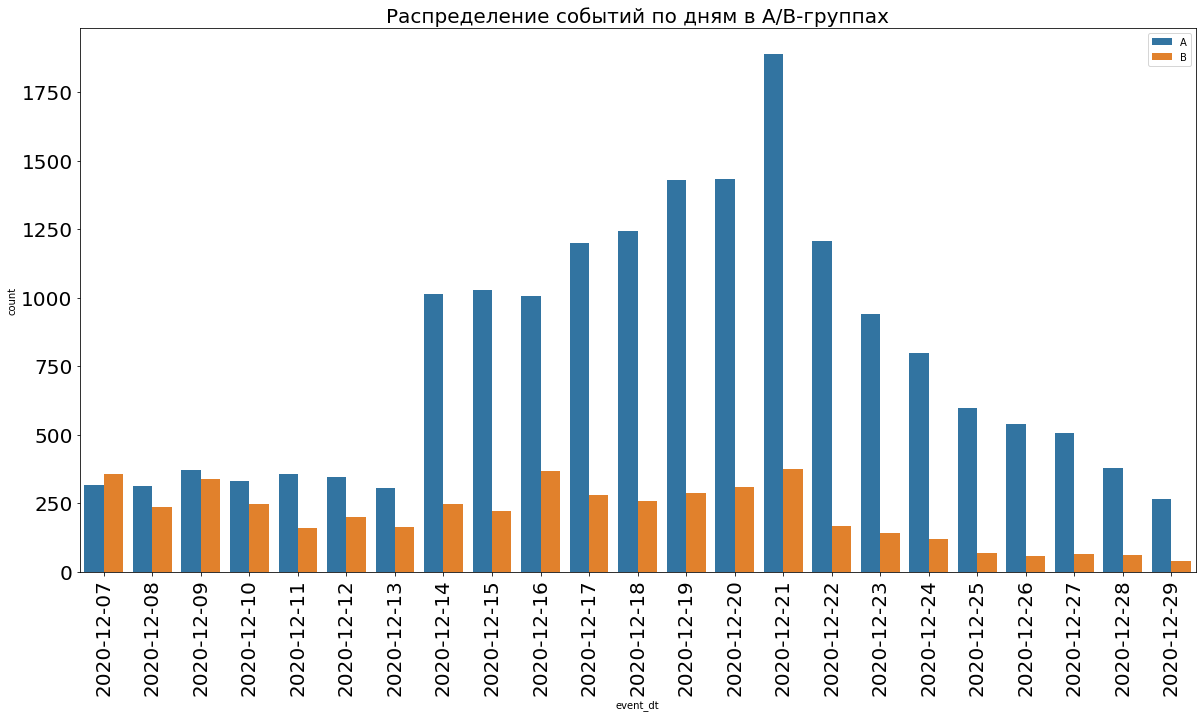

In [56]:
for col in categorical_columns:
    plt.figure(figsize=(20, 10))
    sns.countplot(x=conversion[col], hue='group', data=conversion)
    plt.title('Распределение событий по дням в A/B-группах', fontsize=20)
    plt.xticks(rotation= 90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend()
    plt.show()

### - Как меняется конверсия в воронке в выборках на разных этапах?

In [57]:
conversion_funnel = conversion

conversion_funnel.loc[conversion_funnel['event_name'] == 'login', 'stage'] = '1 - login'
conversion_funnel.loc[conversion_funnel['event_name'] == 'product_page', 'stage'] = '2 - product_page'
conversion_funnel.loc[conversion_funnel['event_name'] == 'product_cart', 'stage'] = '3 - product_cart'
conversion_funnel.loc[conversion_funnel['event_name'] == 'purchase', 'stage'] = '4 - purchase'
conversion_funnel

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,stage
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,purchase,99.99,2020-12-07,EU,PC,4 - purchase
4630,849E62FB58ECD9E8,B,recommender_system_test,2020-12-07,login,0.00,2020-12-07,EU,Android,1 - login
4626,849E62FB58ECD9E8,B,recommender_system_test,2020-12-07,product_page,0.00,2020-12-07,EU,Android,2 - product_page
20326,B8F5A3560F2DF46E,B,recommender_system_test,2020-12-07,product_page,0.00,2020-12-07,EU,PC,2 - product_page
20329,B8F5A3560F2DF46E,B,recommender_system_test,2020-12-07,login,0.00,2020-12-07,EU,PC,1 - login
...,...,...,...,...,...,...,...,...,...,...
15672,80D722A2C625E8B9,B,recommender_system_test,2020-12-29,login,0.00,2020-12-17,EU,PC,1 - login
19478,1BBC192A44A077EC,A,recommender_system_test,2020-12-29,login,0.00,2020-12-18,EU,Android,1 - login
8884,14AB9446E8FD3584,A,recommender_system_test,2020-12-29,purchase,4.99,2020-12-17,EU,Android,4 - purchase
21580,DD9DDDB53DA30E40,A,recommender_system_test,2020-12-29,login,0.00,2020-12-18,EU,iPhone,1 - login


In [58]:
conversion_funnel_A = conversion_funnel.query('group == "A"')
conversion_funnel_A = conversion_funnel_A.groupby('stage').agg({'user_id':'nunique', 'stage':'count'}).rename(columns={'user_id':'number_of_users_in_group','stage':'made_action'})
conversion_funnel_A['funnel_%_A'] = conversion_funnel_A['number_of_users_in_group']/conversion_funnel_A['number_of_users_in_group'][0]
print('Конверсия в воронке на разных этапах, Группа "А" \n\n', conversion_funnel_A)

Конверсия в воронке на разных этапах, Группа "А" 

                   number_of_users_in_group  made_action  funnel_%_A
stage                                                              
1 - login                             2604         7907        1.00
2 - product_page                      1685         5082        0.65
3 - product_cart                       782         2361        0.30
4 - purchase                           833         2485        0.32


In [59]:
conversion_funnel_B = conversion_funnel.query('group == "B"')
conversion_funnel_B = conversion_funnel_B.groupby('stage').agg({'user_id':'nunique', 'stage':'count'}).rename(columns={'user_id':'number_of_users_in_group','stage':'made_action'})
conversion_funnel_B['funnel_%_B'] = conversion_funnel_B['number_of_users_in_group']/conversion_funnel_B['number_of_users_in_group'][0]
print('Конверсия в воронке на разных этапах, Группа "B" \n\n', conversion_funnel_B)

Конверсия в воронке на разных этапах, Группа "B" 

                   number_of_users_in_group  made_action  funnel_%_B
stage                                                              
1 - login                              876         2310        1.00
2 - product_page                       493         1240        0.56
3 - product_cart                       244          617        0.28
4 - purchase                           249          618        0.28


In [60]:
conversion_final = conversion_funnel_A.merge(conversion_funnel_B, on='stage', how='right')
conversion_final = conversion_final.drop(['number_of_users_in_group_x'], axis=1)
conversion_final = conversion_final.drop(['made_action_x'], axis=1)
conversion_final = conversion_final.drop(['number_of_users_in_group_y'], axis=1)
conversion_final = conversion_final.drop(['made_action_y'], axis=1)
conversion_final['change'] = conversion_final['funnel_%_B'] - conversion_final['funnel_%_A']
conversion_final

,funnel_%_A,funnel_%_B,change
stage,,,
1 - login,1.00,1.00,0.00
2 - product_page,0.65,0.56,-0.08
3 - product_cart,0.30,0.28,-0.02
4 - purchase,0.32,0.28,-0.04


На каждом этапе мы видим лишь снижение уровня конверсии в группе B (новая платёжная воронка) по сравнению со значением контрольной группы А.

### - Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

Перед началом проведения A/B-тестирования нужно обратить внимание на:

- возможные пересечения тестовой аудитории с конкурирующим тестом
- возможные пересечения пользователей внутри групп одного теста
- совпадения времени проведения теста с другими маркетинговыми событиями, акциями, спецпредложениями
- отсутствие пустых значений и дубликатов в исходных данных
- соответствие реальных данных в тесте условиям, обозначенным в ТЗ
- чётко обозначенные цели проведения A/B-тестирования

# Шаг 4. Проведение оценки результатов A/B-тестирования

### - Что можно сказать про результаты A/B-тестирования?

По результатам A/B-тестирования можно сделать выводы о том, что:
- На каждом этапе мы видим лишь снижение уровня конверсии в группе B (новая платёжная воронка) по сравнению со значением контрольной группы А.
- не все условия из ТЗ были соблюдены, во время проведения теста
- по результатам проведения теста не наблюдается улучшения рассматриваемых метрик
- на результаты данного теста могли повлиять маркетинговые события Christmas&New Year Promo
- нельзя отметить равного распределения пользователей в тесте, над этим нужно работать
- распределение событий по дням в группах A/B-неравномерно 

### - Проверить статистическую разницу долей z-критерием

### Гипотеза 1a.  Группы A и B демонстрируют разную конверсию в действие product_page.

**Нулевая гипотеза Н0:** Конверсия в действие product_page у пользователей из групп A и B не различается - ОДИНАКОВАЯ<br><br>
**Альтернативная гипотеза:** Конверсия в действие product_page у пользователей из групп A и B различается - РАЗНАЯ;

In [61]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)

    if (p_value < alpha): 
        display('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')
   

In [62]:
z_test(conversion_funnel_A['number_of_users_in_group'][1],conversion_funnel_B['number_of_users_in_group'][1],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])
print('Подставляемые значения: ', conversion_funnel_A['number_of_users_in_group'][1],conversion_funnel_B['number_of_users_in_group'][1],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])

p-значение:  8.195976000324734e-06


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

Подставляемые значения:  1685 493 2604 876


### Гипотеза 1b.  Группы A и B демонстрируют разную конверсию в действие product_cart.

**Нулевая гипотеза Н0:** Конверсия в действие product_cart у пользователей из групп A и B не различается - ОДИНАКОВАЯ<br><br>
**Альтернативная гипотеза:** Конверсия в действие product_cart у пользователей из групп A и B различается - РАЗНАЯ;

In [63]:
z_test(conversion_funnel_A['number_of_users_in_group'][2],conversion_funnel_B['number_of_users_in_group'][2],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])
print('Подставляемые значения: ', conversion_funnel_A['number_of_users_in_group'][2],conversion_funnel_B['number_of_users_in_group'][2],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])

p-значение:  0.2215941567364419


'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет'

Подставляемые значения:  782 244 2604 876


### Гипотеза 1c.  Группы A и B демонстрируют разную конверсию в действие purchase.

**Нулевая гипотеза Н0:** Конверсия в действие purchase у пользователей из групп A и B не различается - ОДИНАКОВАЯ<br><br>
**Альтернативная гипотеза:** Конверсия в действие purchase у пользователей из групп A и B различается - РАЗНАЯ;

In [64]:
z_test(conversion_funnel_A['number_of_users_in_group'][3],conversion_funnel_B['number_of_users_in_group'][3],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])
print('Подставляемые значения: ', conversion_funnel_A['number_of_users_in_group'][3],conversion_funnel_B['number_of_users_in_group'][3],conversion_funnel_A['number_of_users_in_group'][0],conversion_funnel_B['number_of_users_in_group'][0])

p-значение:  0.04864766695042433


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

Подставляемые значения:  833 249 2604 876


# Шаг 5. Общие выводы 

### - сформировать выводы по результатам исследования

На этапе предобработки данных мы импортировали необходимые библиотеке, после этого мы подгрузили четыре таблицы, с которыми будем работать в дальнейшем. После этого мы ознакомились с данными, проверили каждую таблицу на наличие пропущенных значений и дубликатов. В таблице “ab_new_users” было 377577 пропущенных значений (это связано с тем, что в данной колонке - “details”, указывается стоимость покупки, только во время события purchase. Пропущенные значения были заменены на 0). Также, для всех столбцов с датами был изменен тип данных для удобства дальнейшей работы. 

**Данные были подготовлены для анализа.** 

Во время оценки корректности проведения теста мы выяснили, что:

- ожидаемое количество участников теста, которые совершают события, оказалось значительно меньше (3481 вместо 6000)
- Фактическое начало набора новых пользователей корректно
- фактическая остановка набора новых пользователей завершилась на два дня позднее срока, обозначенного в ТЗ
- доля пользователей из EU составляет 15% (Условие выполнено)
- На наш тест могут влиять Christmas&New Year Promo
- в нашем тесте отсутствуют “пересечения” пользователей в A/B-группах 
- есть пересечения с “конкурирующим тестом”, количество уникальных пользователей, которые одновременно участвуют в двух тестах: 1602
- нужно работать над более равномерным распределением пользователей по группа A/B-теста, есть перекос, которого можно избегать в дальнейшем (группа А - 57%, группа B - 43%)

Во время исследовательского анализа данных мы узнали, что:
- распределение количества событий на пользователя в группах почти одинаковое. Также, мы выяснили, что:
    - среднее количество событий на пользователя в группе А: 6.85
    - среднее количество событий на пользователя в группе B: 5.46
- распределение событий по дням в группах неравномерно

Также, нужно отметить, что перед началом проведения A/B-тестирования нужно обратить внимание на:

- возможные пересечения тестовой аудитории с конкурирующим тестом
- возможные пересечения пользователей внутри групп одного теста
- совпадения времени проведения теста с другими маркетинговыми событиями, акциями, спецпредложениями
- отсутствие пустых значений и дубликатов в исходных данных
- соответствие реальных данных в тесте условиям, обозначенным в ТЗ
- чётко обозначенные цели проведения A/B-тестирования

В целом, по результатам A/B-тестирования можно сделать выводы о том, что:
- На каждом этапе мы видим лишь снижение уровня конверсии в группе B (новая платёжная воронка) по сравнению со значением контрольной группы А
- не все условия из ТЗ были соблюдены, во время проведения теста
- на результаты данного теста могли повлиять маркетинговые события Christmas&New Year Promo
- распределение событий по дням в группах A/B-неравномерно 

После этого мы перешли к проверке гипотез и получили следующие результаты:
- Конверсия в действие product_page у пользователей из групп A и B различается - РАЗНАЯ;
- Конверсия в действие product_cart у пользователей из групп A и B различается - РАЗНАЯ;
- Конверсия в действие purchase у пользователей из групп A и B различается - РАЗНАЯ

Подводя итог, учитывая те недостатки, которые были выявлены на этапе проверки соответствия теста, предоставленному ТЗ, и тем более того, что нам не удалось получить ожидаемого роста анализируемых метрик данный тест **нельзя считать корректным**.

### - сформулировать рекомендации

1. Во время проведения дальнейшего A/B-тестирования необходимо обращать пристальное внимание на каждый пункт ТЗ, и составлять выборку строго в соответствии с каждым из требований.
2. Проверять выборки для тестирования на наличие возможных “пересечений”, а также обращать внимание на то, какие маркетинговые компании проводит платформа во время проведения тестирования.
